In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# ['English foxhound',
#  'barracouta',
#  'monitor',
#  'pickup',
#  'grocery store',
#  'spotted salamander']

names = ["foxhound", "barracouta", "monitor", "pickup", "grocery", "salamander"]

fnames = [f"wandb_csvs/{n}_plot.csv" for n in names]

In [3]:
d = pd.read_csv("wandb_csvs/foxhound_plot.csv")
d[d["Step"] <= 250]
d.columns = ["Step", "mean", "min", "max"]
d["mean"].iloc[0]

np.float64(-0.2893220102414489)

In [4]:
import numpy as np

In [5]:
# stds = [np.float64(0.4382138872938365),
#  np.float64(0.547043273477445),
#  np.float64(0.5146243770585446),
#  np.float64(0.7650964648577642),
#  np.float64(0.33527548205144264),
#  np.float64(0.32660317562056895)]
max_minus_median = {'salamander': np.float64(0.17243820428848267),
 'foxhound': np.float64(0.8450099229812622),
 'barracouta': np.float64(1.1935052871704102),
 'pickup': np.float64(0.6948034390807152),
 'monitor': np.float64(0.6170500256121159),
 'grocery': np.float64(0.9301164075732231)}

max_minus_mean = {'salamander': np.float64(0.2608385131508113),
 'foxhound': np.float64(0.9510067731468007),
 'barracouta': np.float64(1.16644612044096),
 'pickup': np.float64(0.9219485091976821),
 'monitor': np.float64(0.7655662995483726),
 'grocery': np.float64(0.953399425377138)}
max_minus = [max_minus_median[p] for p in names]
diffs = []
for i, fname in enumerate(fnames):
    d = pd.read_csv(fname)
    d = d[d["Step"] <= 250]
    d.columns = ["Step", "mean", "min", "max"]
    last_mean = d['mean'].iloc[-1]
    first_mean = d['mean'].iloc[0]
    diffs.append(last_mean - first_mean)

<Figure size 640x480 with 0 Axes>

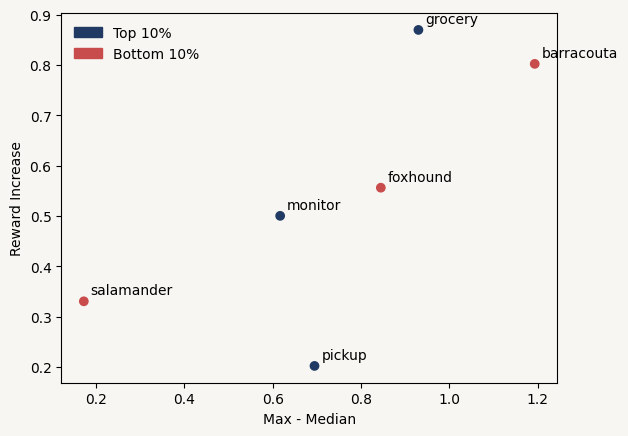

In [6]:
from matplotlib.patches import Patch
plt.figure(facecolor="#F7F6F2")
offwhite = "#F7F6F2"
fig, ax = plt.subplots()
fig.patch.set_facecolor("#F7F6F2")
labels = []
colors = []
for txt in names:
    if txt in ["pickup", "monitor", "grocery"]:
        label = "Top 10%"
        color = "#203A63"

    else:
        label = "Bottom 10%"
        color = "#C94C4C"
    
    labels.append(label)
    colors.append(color)
ax.scatter(max_minus, diffs, c=colors)
ax.set_xlabel("Max - Median")
ax.set_ylabel("Reward Increase")
legend_handles = [Patch(color=c, label=k) for (c,k) in zip(list(set(colors)), list(set(labels)))]

for x_i, y_i, txt in zip(max_minus, diffs, names):
    if txt in ["pickup", "monitor", "grocery"]:
        label = "Top 10%"
        color = "#203A63"

    else:
        label = "Bottom 10%"
        color = "#C94C4C"
    plt.annotate(txt, (x_i, y_i),
                xytext=(5, 5),            # pixel offset so text isn’t on top of the marker
                textcoords='offset points')
    
ax.legend(handles=legend_handles, frameon=False)
ax.set_facecolor(offwhite)
plt.show()

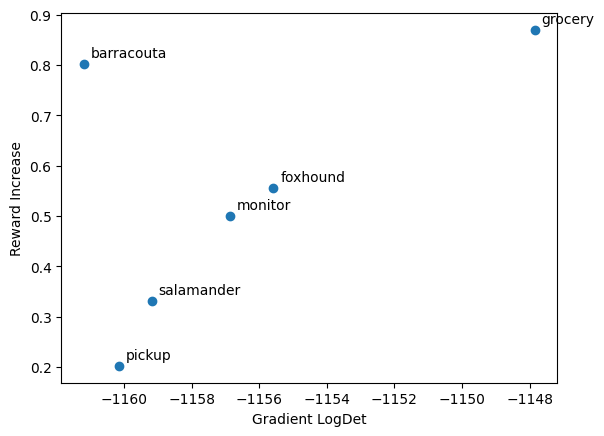

In [10]:
logdet = {'salamander': -1159.1831, 
 'foxhound': -1155.5809, 
 'barracouta': -1161.1865, 
 'pickup': -1160.1431, 
'monitor': -1156.8757, 
 'grocery': -1147.8513}

ld = [logdet[p] for p in names]
plt.scatter(ld, diffs)
plt.xlabel("Gradient LogDet")
plt.ylabel("Reward Increase")

for x_i, y_i, txt in zip(ld, diffs, names):
    plt.annotate(txt, (x_i, y_i),
                xytext=(5, 5),            # pixel offset so text isn’t on top of the marker
                textcoords='offset points')



